<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/R%C3%A9gression_maison_anns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/kc_house_data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.corr(numeric_only=True)['price'].sort_values()

,price
zipcode,-0.053402
id,-0.016772
long,0.022036
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.126424
floors,0.256804
waterfront,0.266398


<Figure size 1200x800 with 0 Axes>

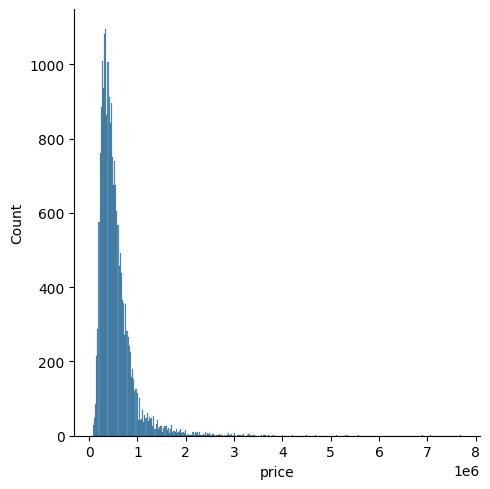

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df['price']);

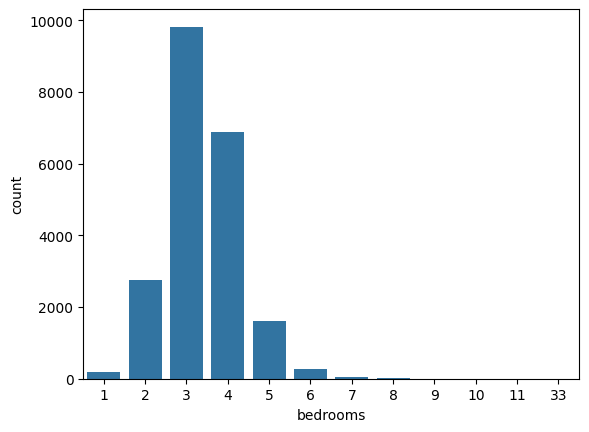

In [ ]:
sns.countplot(x=df['bedrooms']);

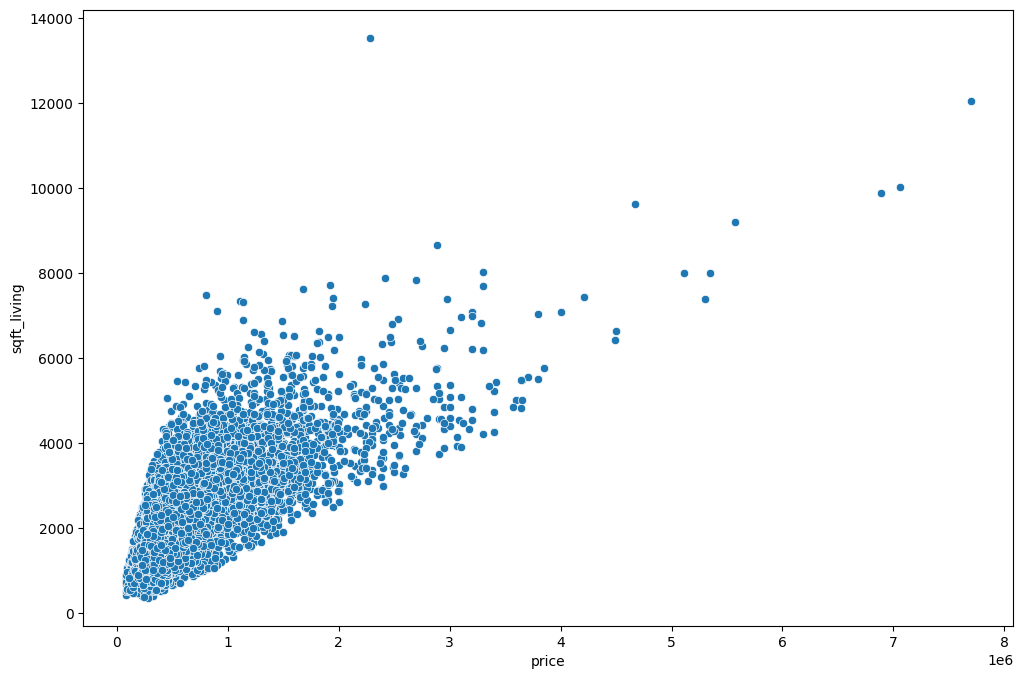

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df);

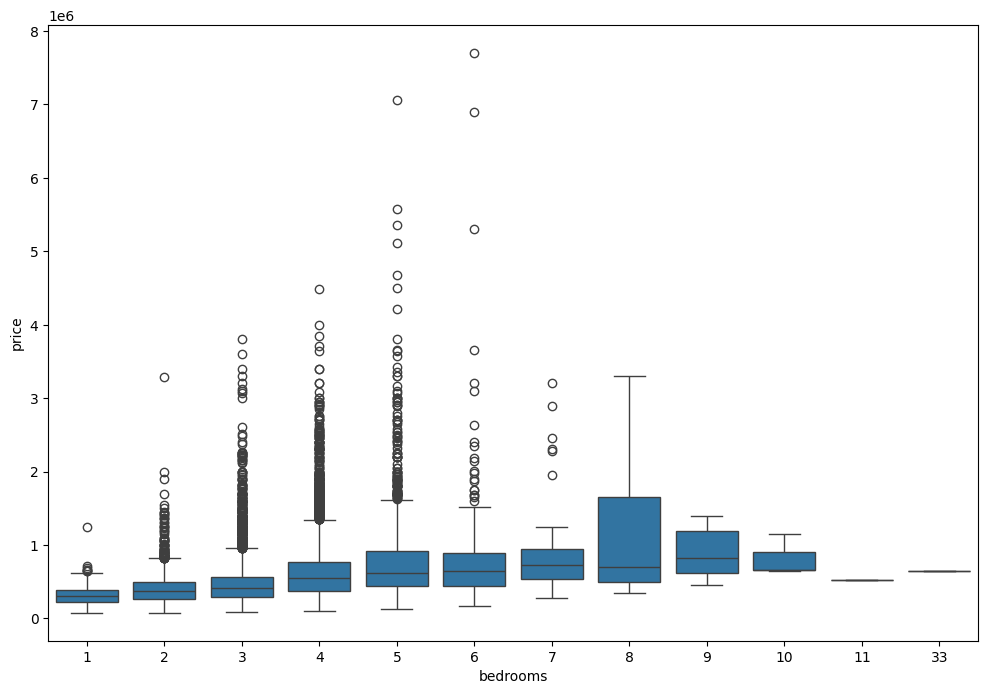

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df);

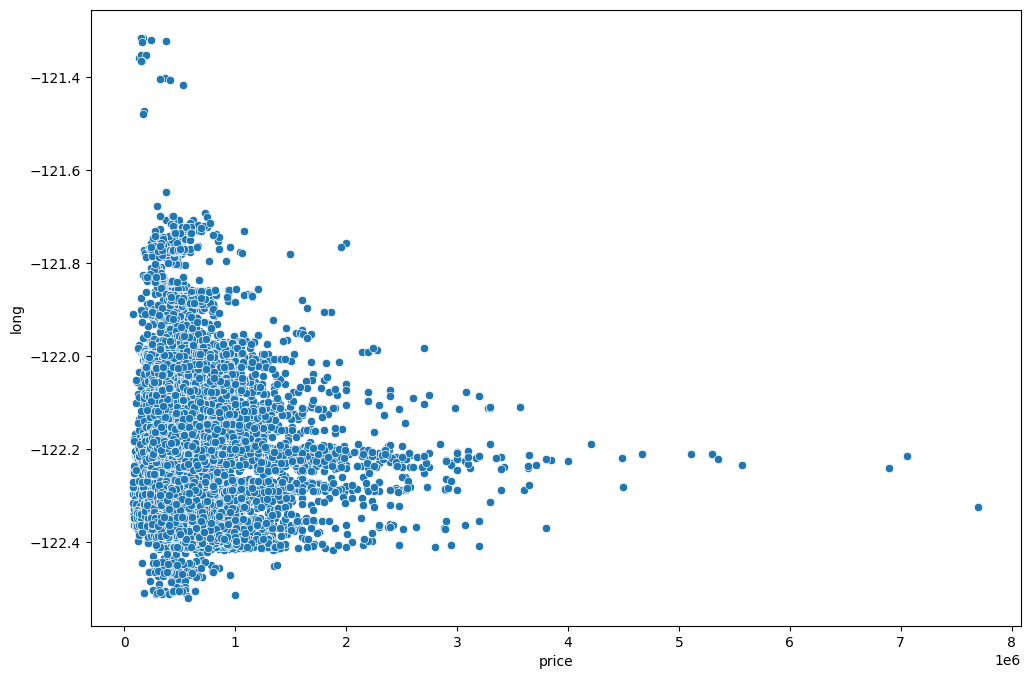

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df);

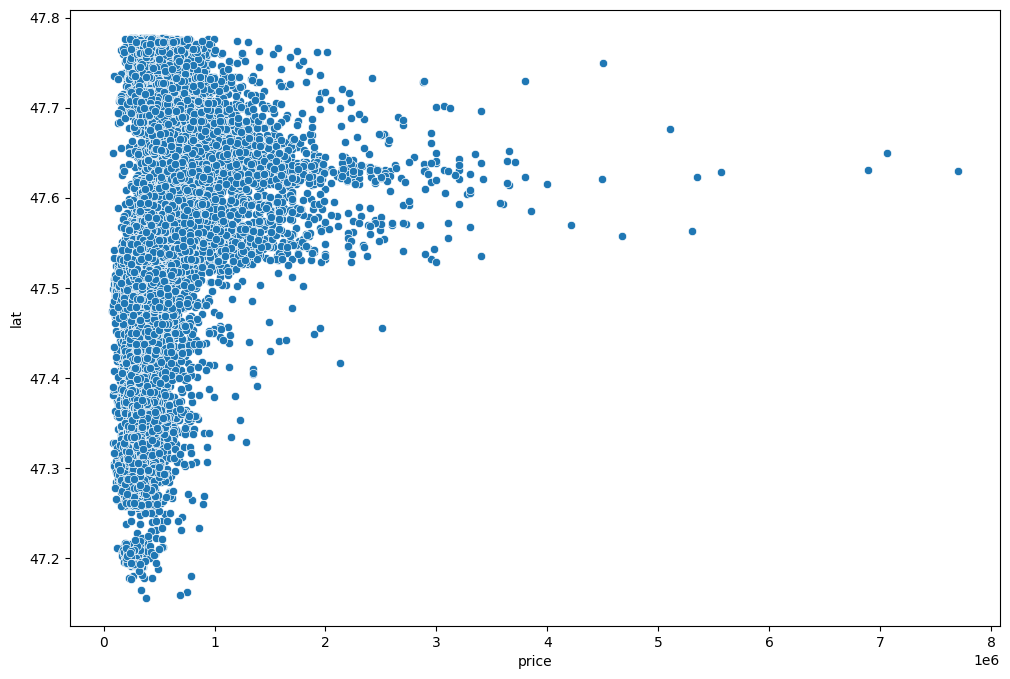

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df);

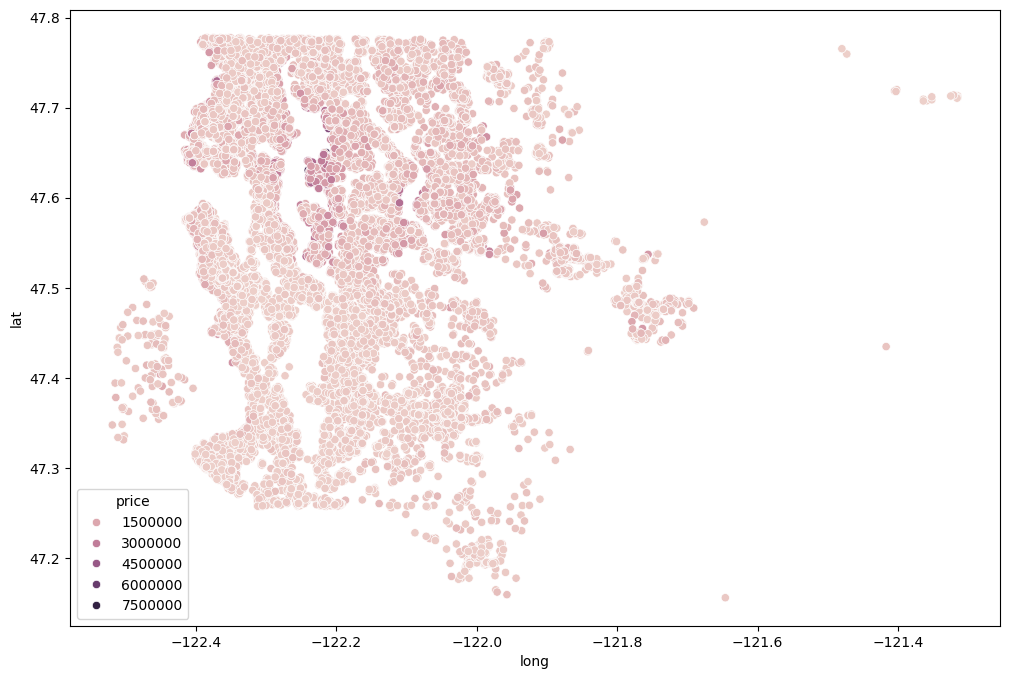

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price');

In [ ]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
len(df)*(0.01)

215.97

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

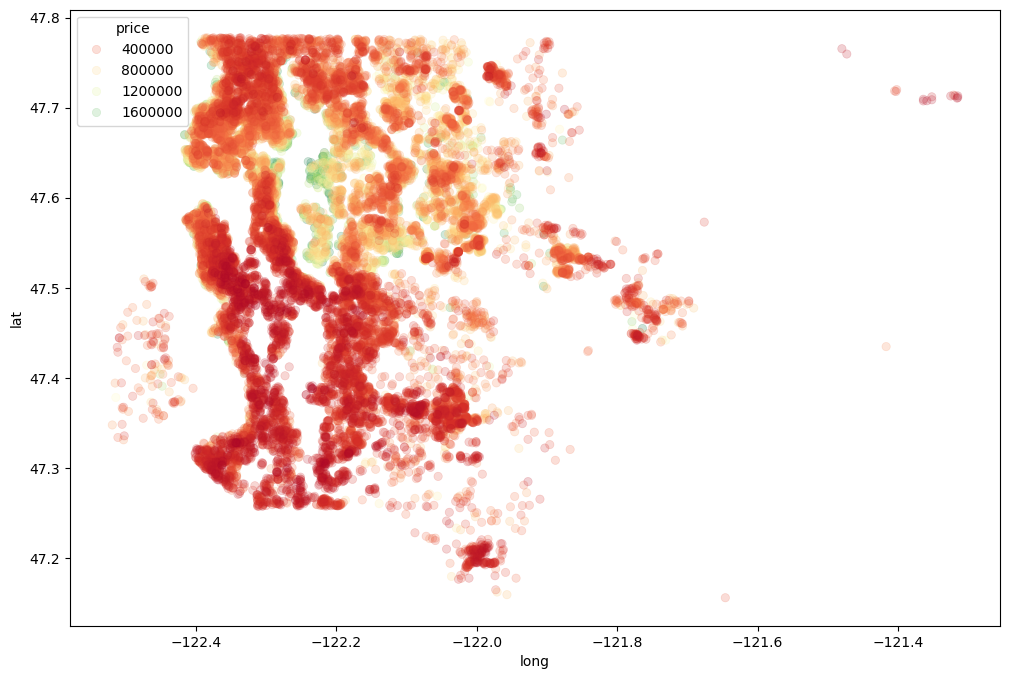

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2);

### Autres Features

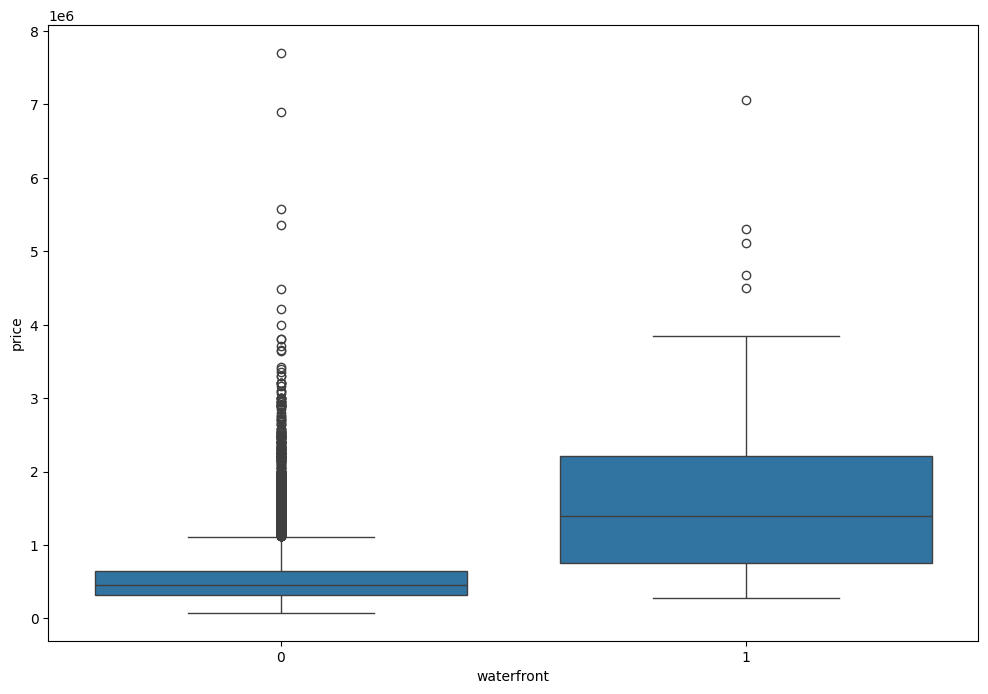

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='waterfront',y='price',data=df);

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)

In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)

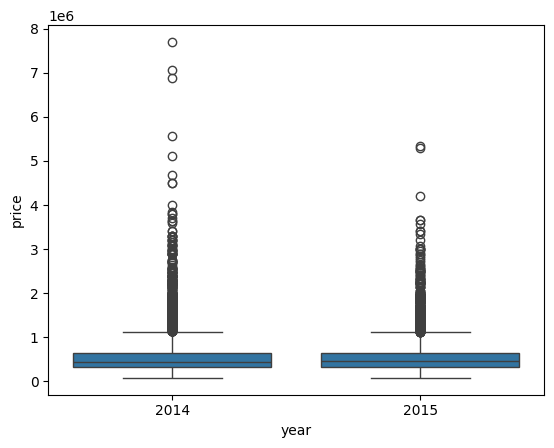

In [ ]:
sns.boxplot(x='year',y='price',data=df);

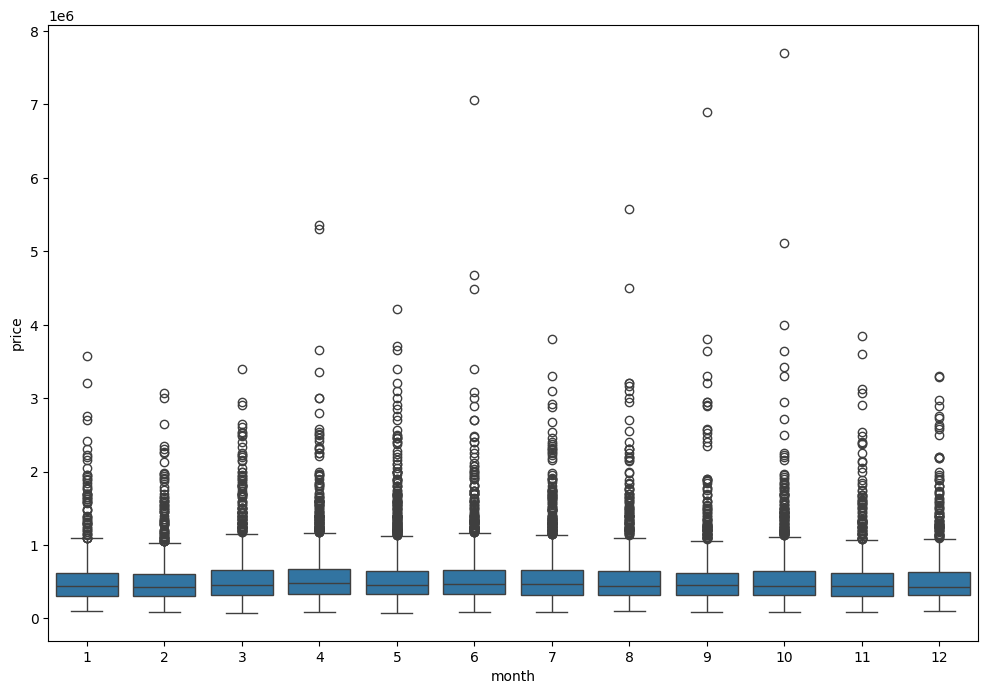

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df);

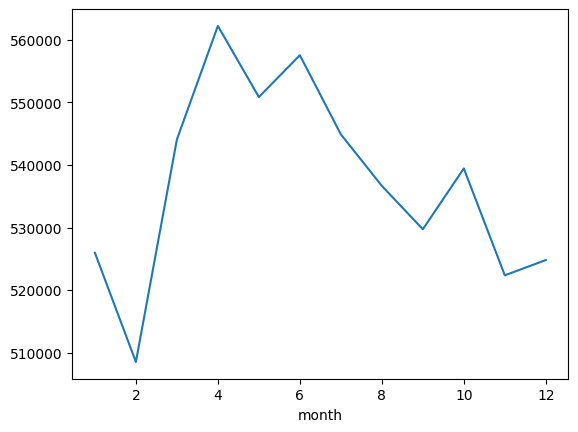

In [ ]:
df.groupby('month').mean()['price'].plot();

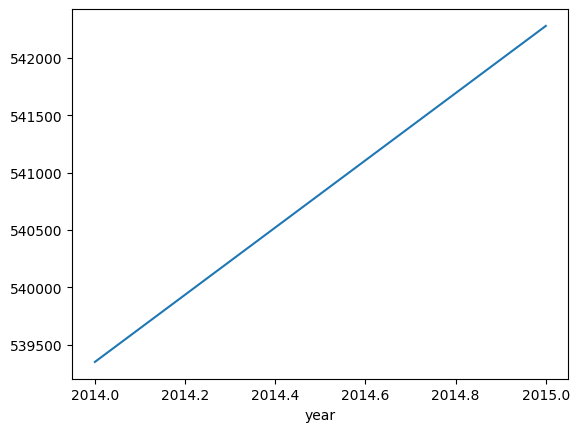

In [ ]:
df.groupby('year').mean()['price'].plot();

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [ ]:
df['zipcode'].value_counts()

,count
zipcode,
98103,602
98038,589
98115,583
98052,574
98117,553
...,...
98102,104
98010,100
98024,80


In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [ ]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,20683
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


In [ ]:
df['sqft_basement'].value_counts()

,count
sqft_basement,
0,13110
600,221
700,218
500,214
800,206
...,...
518,1
374,1
784,1


In [ ]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(15117, 19)

In [ ]:
X_test.shape

(6480, 19)

## Création du modèle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 420203397120.0000 - val_loss: 418931474432.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 437699313664.0000 - val_loss: 416710393856.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 430712881152.0000 - val_loss: 397075283968.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 392039071744.0000 - val_loss: 322483945472.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 300819939328.0000 - val_loss: 185104826368.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 160690798592.0000 - val_loss: 102044049408.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99239362560.0000 - val_loss: 94752980992.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110085251072.0000 - val_loss: 93410131968.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 98851233792.0000 - val_loss: 92087042048.0000
Epoch 10/400
119/119 ━━━

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,4.302411e+11,4.189315e+11
1,4.295714e+11,4.167104e+11
2,4.209648e+11,3.970753e+11
3,3.772657e+11,3.224839e+11
4,2.659396e+11,1.851048e+11
...,...,...
395,2.997980e+10,2.789995e+10
396,2.996935e+10,2.783216e+10
397,2.992576e+10,2.783119e+10
398,2.996063e+10,2.778548e+10


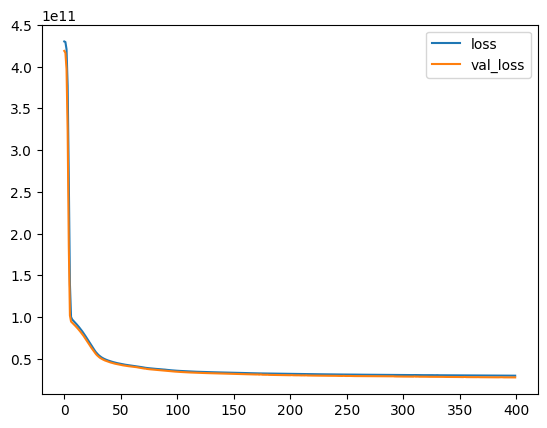

In [ ]:
losses.plot();

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [ ]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mean_absolute_error(y_test,predictions)

103629.18764226466

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

166932.83287981455

In [ ]:
explained_variance_score(y_test,predictions)

0.7903347633859547

In [ ]:
df['price'].mean()

540296.5735055795

In [ ]:
df['price'].median()

450000.0

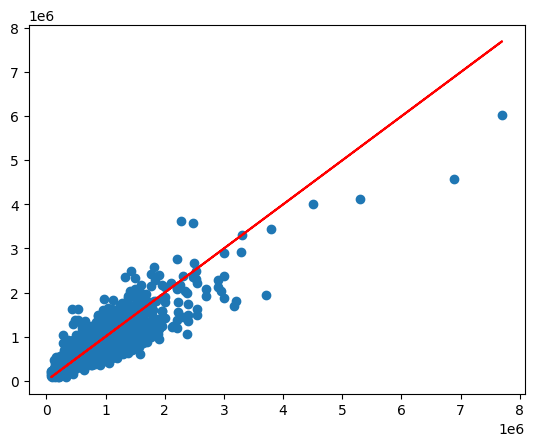

In [ ]:
#Prédiction
plt.scatter(y_test,predictions)

#Prédiction parfaite
plt.plot(y_test,y_test,'r');

In [ ]:
errors = y_test - predictions

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [ ]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[289955.75]], dtype=float32)

In [ ]:
df.iloc[0]

,0
price,221900.0000
bedrooms,3.0000
bathrooms,1.0000
sqft_living,1180.0000
sqft_lot,5650.0000
floors,1.0000
waterfront,0.0000
view,0.0000
condition,3.0000
grade,7.0000
